In [1]:
# Problem 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats

In [2]:
# Problem 2
# Load Hospital Data into a df
hospital_file = "HospitalAdmissionsData.csv"
df = pd.read_csv(hospital_file)
df.head()

,ID,AdmissionLengthDays,Death_1,Admission_Type,Insurance_Type,EnglishLanguage_1,Religion_Type,Married_1,Race,Dx
0,42862,4.277778,0,elective,private,1,episcopalian,1,white,mitral stenosis\mitral valve replacement /sda
1,5967,26.122917,0,elective,private,0,catholic,1,white,duodenal mass/sda
2,50952,7.028472,1,emergency,medicare,1,catholic,0,asian - japanese,? serotonin syndrome
3,17138,34.187500,0,elective,medicare,1,catholic,1,white,abdominal aortic aneurysm/sda
4,27703,6.165972,0,elective,government,0,protestant quaker,0,black/african american,absence/sda


In [4]:
# Problem 3a
# What are the columns
df.columns

Index(['ID', 'AdmissionLengthDays', 'Death_1', 'Admission_Type',
       'Insurance_Type', 'EnglishLanguage_1', 'Religion_Type', 'Married_1',
       'Race', 'Dx'],
      dtype='object')

In [6]:
# Problem 3b
# What are the column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58863 entries, 0 to 58862
Data columns (total 10 columns):
ID                     58863 non-null int64
AdmissionLengthDays    58863 non-null float64
Death_1                58863 non-null int64
Admission_Type         58863 non-null object
Insurance_Type         58863 non-null object
EnglishLanguage_1      58863 non-null int64
Religion_Type          58408 non-null object
Married_1              58863 non-null int64
Race                   58863 non-null object
Dx                     58863 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 4.5+ MB


In [7]:
"""
Problem 3bc
float64:
    AdmissionLengthDays

int64:
    ID
    Death_1
    EnglishLanguage_1
    Married_1

object:
    Admission_Type
    Insurance_Type
    Religion_Type
    Race
    Dx
"""

'\nProblem 3bc\nfloat64:\n    AdmissionLengthDays\n\nint64:\n    ID\n    Death_1\n    EnglishLanguage_1\n    Married_1\n\nobject:\n    Admission_Type\n    Insurance_Type\n    Religion_Type\n    Race\n    Dx\n'

In [14]:
# Problem 3d
df.Insurance_Type.unique()

array(['private', 'medicare', 'government', 'medicaid', 'self pay'],
      dtype=object)

In [16]:
# Problem 3e
df.AdmissionLengthDays.describe()

count    58863.000000
mean        10.138978
std         12.465611
min         -0.945139
25%          3.743056
50%          6.465972
75%         11.798264
max        294.660417
Name: AdmissionLengthDays, dtype: float64

In [32]:
# Problem 3f
df.Admission_Type.value_counts()
df.Insurance_Type.value_counts()
df.Religion_Type.value_counts()
df.Race.value_counts()
df.Dx.value_counts()

newborn                                               7823
pneumonia                                             1566
sepsis                                                1184
congestive heart failure                               928
coronary artery disease                                840
                                                      ... 
s/p infarct\cardiac cath                                 1
shortness of breath;rule-out myocardial infraction       1
hypernatremia,hypothermia                                1
fournier ganggrene                                       1
gastroparesis,hypertension                               1
Name: Dx, Length: 15647, dtype: int64

In [33]:
"""
Most Common Values:

Admission_Type
    emergency

Insurance
    medicare
    
Religion_Type
    catholic

Race
    white

Dx
    newborn
"""

'\nMost Common Values:\n\nAdmission_Type\n    emergency\n\nInsurance\n    medicare\n    \nReligion_Type\n    catholic\n\nRace\n    white\n\nDx\n    newborn\n'

Text(0.5, 1.0, 'Histogram of AdmissionLengthDays')

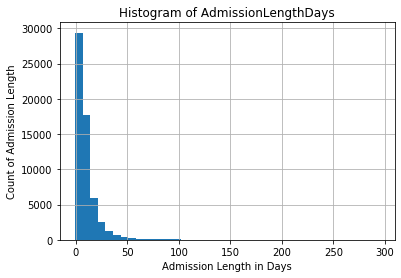

In [49]:
# Problem 3g
df.hist(column="AdmissionLengthDays", bins=40)
plt.xlabel("Admission Length in Days")
plt.ylabel("Count of Admission Length")

plt.title("Histogram of AdmissionLengthDays")

Text(0.5, 1.0, 'Histogram of AdmissionLengthDays')

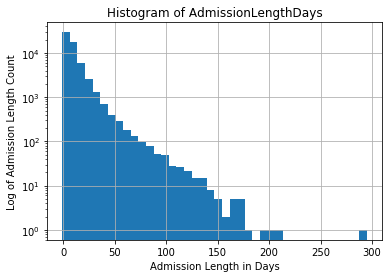

In [51]:
# Problem 3g
df.hist(column="AdmissionLengthDays", bins=40)
plt.yscale("log")
plt.xlabel("Admission Length in Days")
plt.ylabel("Log of Admission Length Count")
plt.title("Histogram of AdmissionLengthDays")


'\nThe admission length of people who died is comparatively shorter than \nthose who did not die. Maybe the death cuts the admission time short.\n'

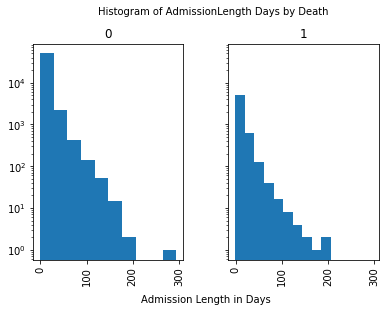

In [75]:
# Problem 3h
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)
df.hist(column="AdmissionLengthDays", by=df.Death_1, ax=axes)
fig.text(0.25, 1, "Histogram of AdmissionLength Days by Death")
fig.text(0.35, 0, "Admission Length in Days")

plt.yscale('log')
"""
The admission length of people who died is comparatively shorter than 
those who did not die.
"""

'\nThe death count for medicare and private are the highest.\nThis makes sense since medicare is for seniors, so they \njust generally have a higher risk of dying, given their oldness.\n\nPrivate insurance is the most prevalent insurance type in general, \nso there is just a larger pool of people from which to die.\n'

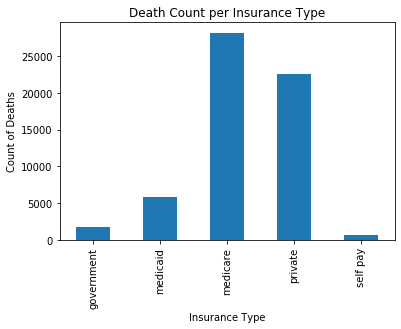

In [94]:
# 3i
ins_death_series = df.groupby("Insurance_Type")["Death_1"].count()
ins_death_series.plot.bar()
plt.ylabel("Count of Deaths")
plt.xlabel("Insurance Type")
plt.title("Death Count per Insurance Type")

"""
The death count for medicare and private are the highest.
This makes sense since medicare is for seniors, so they 
just generally have a higher risk of dying, given their oldness.

Private insurance is the most prevalent insurance type in general, 
so there is just a larger pool of people from which to die.
"""

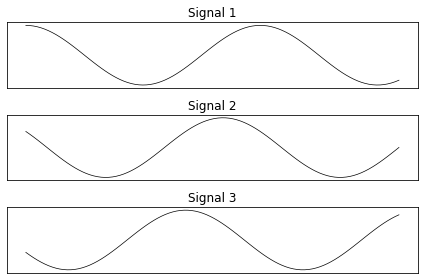

In [137]:
# Plotting with Matplotlib
x = np.linspace(0, 10, 100)
y1, y2, y3 = np.cos(x), np.cos(x + 1), np.cos(x + 2)
names = ['Signal 1', 'Signal 2', 'Signal 3']

ax1 = plt.subplot(311)
ax1.set_title("Signal 1")
ax1 = plt.plot(x, y1, color="black", linewidth=0.7)
plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=False,
    labelleft=False,
    labelright=False
)

ax2 = plt.subplot(312)
ax2.set_title("Signal 2")
ax2 = plt.plot(x, y2, color="black", linewidth=0.7)
plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=False,
    labelleft=False,
    labelright=False
)


ax3 = plt.subplot(313)
ax3.set_title("Signal 3")
ax3 = plt.plot(x, y3, color="black", linewidth=0.7)
plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=False,
    labelleft=False,
    labelright=False
)

plt.tight_layout()
plt.show()